In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from shapely.geometry import Point

In [96]:
ipm_normalizado = pd.read_csv('IPM_normalizado.csv')
iia_normalizado = pd.read_csv('IIA_normalizado.csv')
isce_normalizado = pd.read_csv('average_by_comuna_normalized.csv')
isce_normalizado = isce_normalizado.rename(columns={'comuna': 'codigo'})


sp_normalizado = pd.read_csv('Servicios publicos normalizados 2018')
sp_normalizado['promedio_suscriptores_normalizados'] = sp_normalizado[['suscriptores_normalizados_acueducto', 
                                                                      'suscriptores_normalizados_alcantarillado', 
                                                                      'suscriptores_normalizados_aseo']].mean(axis=1)

ap_normalizado = pd.read_csv('areas_publ_normalizados.csv')
ap_normalizado = ap_normalizado[~ap_normalizado['codigo'].isin(['SN02', 'SN01'])]

salario_normalizado = pd.read_csv('salario_normalizado.csv')
salario_normalizado = salario_normalizado.rename(columns={'comuna': 'codigo'})
salario_normalizado = salario_normalizado.dropna()



In [104]:
ipm_normalizado_2018 = ipm_normalizado[['codigo', 'i_2018']]
iia_normalizado_2018 = iia_normalizado[['codigo','total_2018']]
isce_normalizado_2018 = isce_normalizado[['codigo','isce_total_2018']]
sp_normalizado = sp_normalizado[['codigo','promedio_suscriptores_normalizados']]
ap_normalizado_2018 = ap_normalizado[['codigo','areas_publ_normalizados']]
salario_normalizado_2018 = salario_normalizado[['codigo','salario_normalizado' ]]

isce_normalizado_2018


,codigo,isce_total_2018
0,1.0,0.130750
1,2.0,0.105356
2,3.0,0.162589
3,4.0,0.353615
4,5.0,0.375358
5,6.0,0.170708
6,7.0,0.331292
7,8.0,0.000000
8,9.0,0.430376
9,10.0,0.502247


In [ ]:
import pandas as pd

# Aseguramos que las columnas 'codigo' sean de tipo int
ipm_normalizado_2018['codigo'] = ipm_normalizado_2018['codigo'].astype(int)
iia_normalizado_2018['codigo'] = iia_normalizado_2018['codigo'].astype(int)
isce_normalizado_2018['codigo'] = isce_normalizado_2018['codigo'].astype(float)
sp_normalizado['codigo'] = sp_normalizado['codigo'].astype(int)
ap_normalizado_2018['codigo'] = ap_normalizado_2018['codigo'].astype(int)
salario_normalizado_2018['codigo'] = salario_normalizado_2018['codigo'].astype(int)

# Realizamos las multiplicaciones por los pesos utilizando .loc
ipm_normalizado_2018.loc[:, 'i_2018_ponderado'] = ipm_normalizado_2018['i_2018'] * 0.25
iia_normalizado_2018.loc[:, 'total_2018_ponderado'] = iia_normalizado_2018['total_2018'] * 0.2
isce_normalizado_2018.loc[:, 'isce_total_2018_ponderado'] = isce_normalizado_2018['isce_total_2018'] * 0.30
sp_normalizado.loc[:, 'promedio_suscriptores_normalizados_ponderado'] = sp_normalizado['promedio_suscriptores_normalizados'] * 0.1
ap_normalizado_2018.loc[:, 'areas_publ_normalizados_ponderado'] = ap_normalizado_2018['areas_publ_normalizados'] * 0.10
salario_normalizado_2018.loc[:, 'salario_normalizado_ponderado'] = salario_normalizado_2018['salario_normalizado'] * 0.05

# Unir todos los DataFrames por la columna 'codigo'
combined_df = ipm_normalizado_2018[['codigo', 'i_2018_ponderado']] \
    .merge(iia_normalizado_2018[['codigo', 'total_2018_ponderado']], on='codigo', how='outer') \
    .merge(isce_normalizado_2018[['codigo', 'isce_total_2018_ponderado']], on='codigo', how='outer') \
    .merge(sp_normalizado[['codigo', 'promedio_suscriptores_normalizados_ponderado']], on='codigo', how='outer') \
    .merge(ap_normalizado_2018[['codigo', 'areas_publ_normalizados_ponderado']], on='codigo', how='outer') \
    .merge(salario_normalizado_2018[['codigo', 'salario_normalizado_ponderado']], on='codigo', how='outer')

combined_df['TIQLI'] = combined_df[['i_2018_ponderado', 
                                    'total_2018_ponderado', 
                                    'isce_total_2018_ponderado', 
                                    'promedio_suscriptores_normalizados_ponderado', 
                                    'areas_publ_normalizados_ponderado', 
                                    'salario_normalizado_ponderado']].sum(axis=1)

# Mostrar el DataFrame combinado con la columna TIQLI
print(combined_df.head())


# Si deseas guardar el resultado en un archivo CSV
combined_df.to_csv('combined_ponderados.csv', index=False)


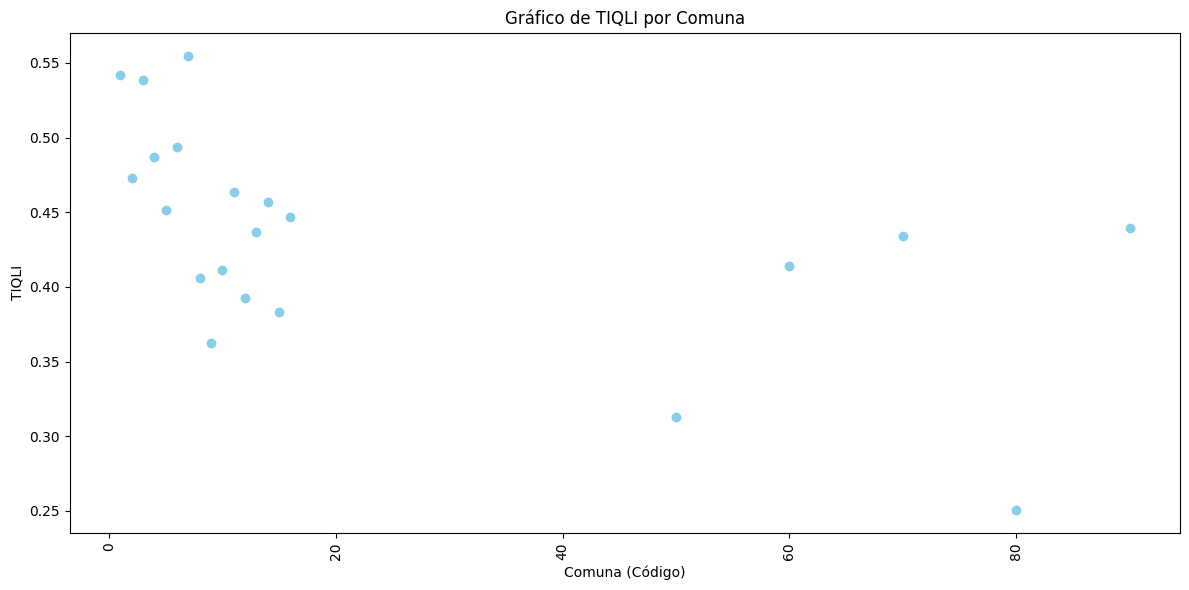

In [113]:
# Graficar la columna 'TIQLI' contra 'codigo' en un gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(combined_df['codigo'], combined_df['TIQLI'], marker='o', linestyle='', color='skyblue')

# Personalizar el gráfico
plt.xlabel('Comuna (Código)')
plt.ylabel('TIQLI')
plt.title('Gráfico de TIQLI por Comuna')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si hay muchos códigos
plt.tight_layout()       # Ajustar el gráfico para evitar recortes

# Mostrar el gráfico
plt.show()
